# Práctica 4 - AG frases en castellano con mutaciones - Lab 1
## Preparación de entorno
#### Instalar las librerías

In [1]:
# %pip install numpy
# %pip install matplotlib
# %pip install pandas

#### Importar librerías de código

In [2]:
import math
import random
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Algoritmo genético SetUp

* **Algoritmos genéticos (GA)** $\rightarrow$ Clasae de algoritmos de optimización basados en los principios de la selección natural y la genética, introducidos por John Holland en 1975. El proceso de un algortimo genético puede descomponerse en los siguientes pasos:

    * **Inicialización de la población:** Se genera un conjunto inicial de soluciones candidata, que se denominan individuos o cromosomas. Cada individuo representa una posible solución al problema y puede representare como una cade binaria, una secuencia de números reales, o, en nuestro caso, una cadena de caracteres.
    
    * **Evaluación de la aptitud:** Cada individuo se evalúa mediante una función de aptitud (*fitness function*), que mide qué tan buena es la solución. 
    
    * **Selección:** Se eligen los individuos más aptos para ser padres de la siguiente generación. Entre los métodos comunes incluyen selección por ruleta, torneo y selección por ranking. Esto básicamente simula la selección natural, donde los individuos más fuertes tienen más probabilidades de reproducirse.

    * **Cruce (crossover):** Los padres seleccionados se combinan para generar nuevos individuos (hijos). Esto puede hacerse mediante técnicas como el cruce de un punto, donde se intercambian partes de los cromosomas de los padre, o cruce uniforme, dependiendo del problema.

    * **Mutación:** Se introducen cambios aleatorios en los individuos con una probabilidad dada (tasa de mutación). La mutación ayuda a mantener la diversidad en la población y evitar el estancamiento en óptimos locales, un problema común en los algoritmos genéticos.

    * **Repetición:** Los pasos de selección, cruce y mutación se repiten durante un número fijo de generaciones o hasta que se cumpla un criterio de parada, como alcanzar un nivel de aptitud deseado o un número máximo de generaciones.


<img src="media/Flow_diagram.jpg" width="30%" style="display: block; margin: 0 auto;"/>

<img src="media/Ejemplo_algoritmo_genetico.jpg" width="80%" style="display: block; margin: 0 auto; padding-top: 15px;"/>

* Aplicaciones de los algoritmos genéticos:
  * **Optimización** $\rightarrow$ Planificación de rutas (problema del viajante), asignación de recursos, optimización de funciones, etc.

  * **Inteligencia artificial** $\rightarrow$ Ajuste de hiperparámetros, entrenamiento de redes neuronales, optimización de arquitecturas.

  * **Ingeniería** $\rightarrow$ Diseño de sistemas aerodinámicos, optimización de circuitos electrónicos, diseño estructural.

  * **Bioinformática** $\rightarrow$ Alineamiento de secuencias de ADN, predicción de estructuras proteicas, análisis genético.

  * **Finanzas** $\rightarrow$ Optimización de carteras, análisis de riesgos, predicción de mercados financieros.

  * **Robótica** $\rightarrow$ Planificación de trayectorias, control de movimientos, optimización de tareas.

  * **Juegos** $\rightarrow$ Desarrollo de estrategis para juegos como el ajedrez, optimización de agenetes en videojuegos.

  * **Procesamiento de Lenguaje Natural:** Optimización de modelos de traducción, análisis de sentimientos, generación de texto.

---

En nuestro problema, cada individuo de la población es una frase candidata al objetivo. Cada cromosoma es un string cuya longitud es igual a la longitud de la frase objetivo, y cada gen es un carácter individual: letra mayúsucla o espacio.

$$\mathcal{G} = \{A, B, C, D, E, F, G, H, I, J, K, L, M, N, Ñ, O, P, Q, R, S, T, U, V, W, X, Y, Z, \hspace{5px}\}$$

El objetivo de nuestro algoritmo es que los individuos se vayan pareciendo cada vez más a la frase objetivo. Para poder calcular este parecido, vamos a definir la función de *fitness* $F_i$: $$F_i = e^{ncoin_i - ltar} - e^{-ltar}$$

donde: 
* $ncoin_i$ es el número de caracteres que coinciden entre el individuo $i$ y nuestra frase objetivo.
* $ltar$ es la longitud de nuestra frase objetivo.

Los resultados que nos puede dar esta función son: 
* $0$ $\rightarrow$ El individuo es completamente diferente a la frase objetivo.
* Cercanas a $0$ $\rightarrow$ El individuo es muy diferente a la frase objetivo.
* Cercanas a $1$ $\rightarrow$ El individuo es muy parecido a la frase objetivo.
* $1 - e^{-ltar}$ $\rightarrow$ El individuo es igual a la frase objetivo (por que $e^0 - e^{-ltar} \to 1$ cuando $ncoin_i = ltar$).

Una vez evaluamos la población inicial, lelvamos a cabo el proceso evolutivo. Este consiste en una serie de generaciones en las que la población se transforma/muta progresivamente. En cada generación, repetimos los siguientes pasos:

Primero, se identificamos el individuo más parecido al objetivo. Este será la referencia para calcular la probabilidad de replicación (generar descendencia) de los demás. Para identificarlo, calculamos el *fitness* de cada inviduo y seleccionamos el que tenga el *fitness* más alto. Este individuo se convierte en el "padre" de la siguiente generación.

A partir de esta referencia, seleccionamos individuos al azar y se decidimos si deben replicarse. Esta decisión se basa en una probabilidad proporcional al *fitness* de cada individuo: cuanto mayor es su *fitness*, mayor es la probabilidad de que genere un nuevo individuo (hijo) mediante copia y posible mutación. Este nuevo individuo sustituye a otro miembro aleatorio de la población, permitiendo que las soluciones más aptas se propaguen con mayor probabilidad a lo largo de las generaciones. La fórmula para calcular la probabilidad de replicación es:

$$Ps_i = \frac{F_i}{e^{ncoin_{max} - ltar} - e^{-ltar}}$$

Una vez hemos elegido un individuo para replicarse, generamos una copia de él, pero aplicando un proceso de mutación genética. Cada carácter de la frase (gen) tiene una probabilidad 4 de ser reemplazado por un carácter aleatorio del conjunto permitido $\mathcal{G}$. Esta transformación se expresa como:

$$gen_{mutado}=
\begin{cases}
\text{carácter aleatorio de } \mathcal{G} & \text{si } P_{random} < P_m \\
g_{original} & \text{si } P_{random} > P_m
\end{cases}$$

El proceso de mutación de un individuo (string) completo consiste en aplicar esta regla a cada uno de sus $l_{tar}$ genes, de forma independiente. Una vez hemos creado el nuevo individuo mutado, este reemplaza a otro individuo de la población elegido aleatoriamente. Esto nos permite mantener constante el tamaño total de la población y da lugar a un ciclo en el que los mejores individuos tienden a replicarse, mientras que los peores son eliminados progresivamente.

Este proceso lo repetimos durante un número determinado de generaciones. De forma periódica, analizamos el estado general de la población, calculando métricas como:
* `NTar` $\rightarrow$ Número de individuos que coinciden completamente con la frase objetivo.
* `Ptar` $\rightarrow$ Porcentaje de individuos que coinciden completamente con la frase objetivo.
* `ncoin` $\rightarrow$ Número medio de coincidencias por individuo.
* `consenso` $\rightarrow$ Individuo consenso, que se construye tomando, para cada posición, el carácter más frecuente entre todos los individuos.

Este último, el individuo consenso, es una herramienta útil para observar hacia dónde está convergiendo la población. Si el consenso coincide con la frase objetivo, podemos interpretar que la gran mayoría de la población ha alcanzado una solución correcta.

> **Nota**
> 
> Utilizamos el [Método Montecarlo](https://www.ibm.com/es-es/topics/monte-carlo-simulation) para introducir decisiones estocásticas, es decir, decisiones que no están determinadas de forma fija, sino que dependen de probabilidades. Estas decisiones las aplicamos en:
> 1. **Decisión de replicación:** A cada inviduo se le asigna una probabilida de reproducirse, proporcional a su *fitness*. Se genera un número aleatorio y, si este es menor que la probabilidad teórica, el individuo genera descendencia.
> 2. **Mutación genética:** Cada carácter del individuo replicado tiene una cierta probabilidad $P_m$ de cambiar por otro carácter aleatorio. Nuevamente, comparamos un número aleatorio con la probabilidad de mutación, lo que nos permite simular de forma sencilla y eficiente procesos evolutivos naturales de forma probabilística.

In [3]:
class AlgoritmoGenetico:
    # Cada gen puede tener ser cualquier letra del alfabeto (A-Z) o un espacio
    GENES = list("ABCDEFGHIJKLMNÑOPQRSTUVWXYZ ")


    def __init__(self, target, NPOB, NGEN, Pm, NRES, NSAMPLE):
        self.target = target
        self.NPOB = NPOB
        self.NGEN = NGEN
        self.Pm = Pm
        self.NRES = NRES
        self.NSAMPLE = NSAMPLE
        self.longitud_target = len(target)


    def crear_individuo(self, ltar: int) -> str:
        """
        Crea un individuo (un string) de longitud ltar
        con letras aleatorias.

        Args:
            ltar (int): Longitud de la frase objetivo.

        Returns:
            str: Individuo aleatorio.
        """
        # Básicamente, mientras estemos dentro el rango de la longitud
        # de la frase objetivo, elegimos un gen (letra o espacio) al azar
        # y lo añadimos a la cadena de caracteres.
        cadena_resultado = ""

        for _ in range(ltar):
            gen = random.choice(self.GENES)
            cadena_resultado += gen

        return cadena_resultado


    def calcular_fitness(self, individuo: str) -> tuple:
        """
        Calcula el fitness (parecido) de un individuo
        con respecto a la frase objetivo. El fitness se calcula
        como la diferencia entre el número de coincidencias
        y la longitud de la frase objetivo.

        Args:
            individuo (str): Individuo a evaluar.

        Returns:
            tuple: (fitness, ncoin)
                * fitness: valor entre 0 y (casi) 1 que mide lo bien que se parece el individuo al target.
                * ncoin (int): Número de coincidencias con la frase objetivo.
        """
        # Número de coincidencias entre el
        # individuo y la frase objetivo
        ncoin = 0

        # Para cada caracter en el individuo comprobamos
        # si coincide con el caracter de la frase objetivo
        for caracter in range(len(individuo)):
            if individuo[caracter] == self.target[caracter]:
                ncoin += 1

        # Número de caracteres de la frase objetivo
        longitud_tar = self.longitud_target

        # Calculamos el fitnes (parecido) entre el individuo y la frase objetivo
        fitness = math.exp(ncoin - longitud_tar) - math.exp(-longitud_tar)

        return fitness, ncoin


    def mutar_gen(self, gen: str) -> str:
        """
        Decide si un gen debe mutar en función de la probabilidad Pm.

        Si el gen muta, elegimos un nuevo al azar de la lista de genes.
        Si no muta, devolvemos el gen original.

        Args:
            gen (str): Carácter del individuo (Mayúscula o espacio).

        Returns:
            str: Nuevo gen (puede estar mutado o no).
        """

        # Elegimos una probabilidad al azar entre 0 y 1.
        # Si la probabilidad es menor que Pm, el gen muta.
        # Si no, devolvemos el gen original.
        probabilidad = random.random()

        if (probabilidad < self.Pm):
            # Elegimos un nuevo gen al azar de la lista de genes
            # y lo devolvemos.
            return random.choice(self.GENES)
        else:
            # Devolvemos el gen original.
            return gen


    def mutar_individuo(self, padre):
        """
        Aplica una mutuación a cda gen de un individuo.

        Recorre todos los genes (caracteres) del individuo padre y, para cada uno,
        decide si debe mutar utilizando la función `mutar_gen`.

        Args:
            padre (str): String original

        Returns:
            str: Nuevo individuo tras aplicar las mutaciones.
        """

        # Creamos un string vacío para el individuo mutado
        individuo_mutado = ""

        # Recorremos cada gen del individuo padre y aplicamos la mutación
        for gen in padre:
            individuo_mutado += self.mutar_gen(gen)

        return individuo_mutado


    def obtener_consenso(self, poblacion):
        """
        Calcula el individuo consenso de una población.

        El inidividuo consenso es un string que contiene el
        caracter más frecuente en cada posición de la población.

        Args:
            poblacion (list): Lista de individuos (strings).

        Returns:
            str: Cadena de consenso construida con los caracteres más
            frecuentes en cada posición.
        """

        # Inicializamos el string para el individuo consenso
        # y recorremos cada posición de la población
        consenso = ""

        # Como todos los individuos tienen la misma longitud, podemos
        # usar la longitud del primer individuo como referencia
        # para recorrer la población.
        for posicion in range(len(poblacion[0])):

            # Cogemos la letra de cada inviduo en la posición actual
            letras = [individuo[posicion] for individuo in poblacion]

            # Contamos cuantas veces aparace cada letra y nos quedamos
            # con la letra que más veces aparece y la añadimos al consenso.
            # Counter(letras) -> Contamos las letras
            # (1) -> Seleccionamos la letra más común -> [tupla(letra, frecuencia)]
            # [0] -> Seleccionamos la tupla -> tupla(letra, frecuencia)
            # [0] -> Seleccionamos la letra de la tupla -> letra
            consenso += Counter(letras).most_common(1)[0][0]

        return consenso


    def ejecutar(self):
        """
        Algoritmo genético para encontrar una frase objetivo

        Returns:
            list: Lista de individuos (strings) que representan la población final.
        """
        # Inicializamos la población con individuos aleatorios
        poblacion = []

        for _ in range(self.NPOB):
            # Creamos un individuo aleatorio de longitud igual a la longitud
            # de la frase objetivo y lo añadimos a la población.
            individuo = self.crear_individuo(self.longitud_target)
            poblacion.append(individuo)

        # Calculamos el fitness de cada individuo en la población
        # y lo guardamos en una lista.
        fitnesses = []
        for individuo in poblacion:
            fitness, _ = self.calcular_fitness(individuo)
            fitnesses.append(fitness)

        # Mostramos la población inicial
        print(f"TARGET: {self.target}, ltar: {self.longitud_target}, NPOB: {self.NPOB}, NGEN: {self.NGEN}, Pm: {self.Pm}")

        # Recorremos cada generación y aplicamos el algoritmo
        for generacion in range(self.NGEN):

            # Calculamos el número de coincidencias con el target para cada individuo
            coincidencias_poblacion = []
            for individuo in poblacion:
                coincidencias = sum(1 for a, b in zip(individuo, self.target) if a == b)
                coincidencias_poblacion.append(coincidencias)

            # Calculamos el valor máximo de coincidencias
            ncoin_max = max(coincidencias_poblacion)

            # Calculamos el fitness máximo (el individuo más parecido al target)
            fitness_max = math.exp(ncoin_max - self.longitud_target) - math.exp(-self.longitud_target)

            for _ in range(self.NPOB):
                # Elegimos un padre al azar de la población
                padre = random.randint(0, self.NPOB - 1)
                fitness_padre, _ = self.calcular_fitness(poblacion[padre])

                probabilidad_reproduccion = 0

                # Si el fitness del padre es mayor que 0, calculamos la probabilidad
                # de reproducción. Si no, la probabilidad es 0.
                if fitness_max != 0:
                    probabilidad_reproduccion = fitness_padre / fitness_max

                # Si la probabilidad de reproducción es mayor que la probabilidad aleatoria
                # mutamos un individuo al azar de la población.
                if random.random() < probabilidad_reproduccion:
                    hijo = self.mutar_individuo(poblacion[padre])
                    fitness_hijo, _ = self.calcular_fitness(hijo)
                    individuo_mutado = random.randint(0, self.NPOB - 1)
                    poblacion[individuo_mutado] = hijo

            # Si la generación es múltiplo de NRES (frecuencia de resumen)
            # o de NSAMPLE (frecuencia de muestreo), mostramos un resumen
            # estadístico de la población.
            if generacion % self.NRES == 0 or generacion % self.NSAMPLE == 0:
                # Calculamos el fitness y el número de coincidencias
                # para cada individuo en la población.
                fitnesses = []
                lista_num_coincidencias = []

                for individuo in poblacion:
                    fitness, _ = self.calcular_fitness(individuo)
                    fitnesses.append(fitness)

                    coincidencias = sum(1 for a, b in zip(individuo, self.target) if a == b)
                    lista_num_coincidencias.append(coincidencias)

                # Calculamos el número de coincidencias máximo (ncoin_max)
                # y el número de coincidencias media (ncoin_media)
                ncoin_max = max(lista_num_coincidencias)
                ncoin_media = np.mean(lista_num_coincidencias)

                # Calculamos el número de individuos que coinciden con el target
                # y el porcentaje de coincidencias (pNTar)
                NTar = lista_num_coincidencias.count(self.longitud_target)
                pNTar = 100 * (NTar / self.NPOB)

                # Calculamos el consenso de la población
                consenso = self.obtener_consenso(poblacion)

                print(f"\nGeneración nº{generacion}: Mejor individuo con {ncoin_max} coincidencias, NTar = {NTar} ({pNTar:.2f}%)")
                print(f"Consenso: {consenso}, Coincidencias medias: {ncoin_media:.2f}")

            # Si la generación es múltiplo de NSAMPLE (frecuencia de muestreo),
            # mostramos una muestra aleatoria de la población.
            if generacion % self.NSAMPLE == 0:

                # Elegimos una muestra aleatoria de la población
                # Como la población puede ser muy pequeña, aseguramos
                # que la muestra tenga al menos un individuo.
                muestra = random.sample(poblacion, max(1, int(self.NPOB * 0.2)))

                print("\n Muestra de la población:")
                for individuo in muestra:
                    print(f" * {individuo}")

        return poblacion

# Parámetros del experimento
target = "DARTH VADER"     # Frase objetivo
NPOB = 100                 # Número de individuos en la población
NGEN = 300                 # Número de generaciones a ejecutar
Pm = 0.1                   # Probabilidad de mutación
NRES = 20                  # Frecuencia de resumen (cada NRES generaciones)
NSAMPLE = 50               # Frecuencia de muestreo (cada NSAMPLE generaciones)

# Ejecutamos el algoritmo como clase
ag = AlgoritmoGenetico(target, NPOB, NGEN, Pm, NRES, NSAMPLE)
resultado = ag.ejecutar()

TARGET: DARTH VADER, ltar: 11, NPOB: 100, NGEN: 300, Pm: 0.1

Generación nº0: Mejor individuo con 2 coincidencias, NTar = 0 (0.00%)
Consenso: VA THJGECÑ , Coincidencias medias: 0.80

 Muestra de la población:
 * ZHGJJSFOWJL
 * ÑBJMHEXBUÑN
 * QSA P QUQAE
 * JNTGKAÑEIVB
 * FBHGCYHUQMU
 * ÑEPNWIXZ JG
 * VAZYLSYA   
 * KSLVHTUEILG
 * W ÑOHXAEWFM
 * BDOHSJHÑAPP
 * UAXTZJBOMPA
 * RENUNPIFKBV
 * NKLRFLAOXCI
 * IYE HMRDAX 
 * FN  J VECÑV
 * ZÑREAHUAGKÑ
 * BJLHHBPZR K
 * KNLOHIGVKLD
 * PT RWJKKMOR
 * EJJTKJTTKEÑ

Generación nº20: Mejor individuo con 5 coincidencias, NTar = 0 (0.00%)
Consenso: DAKTGJBGJMR, Coincidencias medias: 3.28

Generación nº40: Mejor individuo con 7 coincidencias, NTar = 0 (0.00%)
Consenso: DAKTVUVGJAR, Coincidencias medias: 4.22

Generación nº50: Mejor individuo con 7 coincidencias, NTar = 0 (0.00%)
Consenso: DAQTV VAZSR, Coincidencias medias: 5.89

 Muestra de la población:
 * DAETGNVGQAR
 * DAÑTY KBÑBJ
 * DAKOVHVAZRR
 * ZAQTN VGNRV
 * PAKTV VAZSR
 * AAQTX VFIRR
 * DAQUX

Ahora lo que vamos a llevar a cabo es un experimento para analizar cómo se comporta nuestro algoritmo en funciones con ciertas parámetros: la longitud de la frase objetivo, el tamaño de la población y el número de generación. Para hacer esto vamos a utilizar frases y palabras con longitudes que van desde 5 hasta 25 caracteres. El objetivo de este experimiento es comprobar cómo influyen los parámetros en la capacidad de nuestro algoritmo para encontrar exactamente la frase que queremos.

Lo que vamos a hacer es ejecutar el algoritmo varias veces con diferentes combinaciones de frases y configuracion, y recoger las medidades que nos indican su rendimiento: cuantos individuos aciertan la frase por completo, qué porcentaje representan, cuál fue el mejor resultado obtenido y cúal es la media general de aciertos en la población. Luego, vamos a representarlos gráficamente para observar tendencias y poder sacar conclusiones.

Ejecutando experimento: ltar=5, NPOB=50, NGEN=250
TARGET: DOOKU, ltar: 5, NPOB: 50, NGEN: 250, Pm: 0.1

Generación nº0: Mejor individuo con 2 coincidencias, NTar = 0 (0.00%)
Consenso: SAEDJ, Coincidencias medias: 0.22

 Muestra de la población:
 * L FNW
 * DDGTA
 *  UETQ
 * UHHSI
 * JKJVM
 * EWDVS
 * WSSVL
 * SQGTT
 * XGMES
 * ZQVFL
Ejecutando experimento: ltar=5, NPOB=50, NGEN=500
TARGET: DOOKU, ltar: 5, NPOB: 50, NGEN: 500, Pm: 0.1

Generación nº0: Mejor individuo con 2 coincidencias, NTar = 0 (0.00%)
Consenso: VEUGL, Coincidencias medias: 0.30

 Muestra de la población:
 * VXAAG
 * PBTGL
 * IÑPTP
 * LUUYS
 * WV KL
 * FJAOI
 * ÑWRAD
 * JOUQZ
 * VWOZG
 * RZZIS
Ejecutando experimento: ltar=5, NPOB=50, NGEN=1000
TARGET: DOOKU, ltar: 5, NPOB: 50, NGEN: 1000, Pm: 0.1

Generación nº0: Mejor individuo con 2 coincidencias, NTar = 0 (0.00%)
Consenso: HURKK, Coincidencias medias: 0.36

 Muestra de la población:
 * D SCU
 * HOHKD
 * ÑSGRL
 * KJFXK
 * NQWQO
 * KRIVE
 * ZGBDF
 * HOUKD
 * HÑBRK
 *

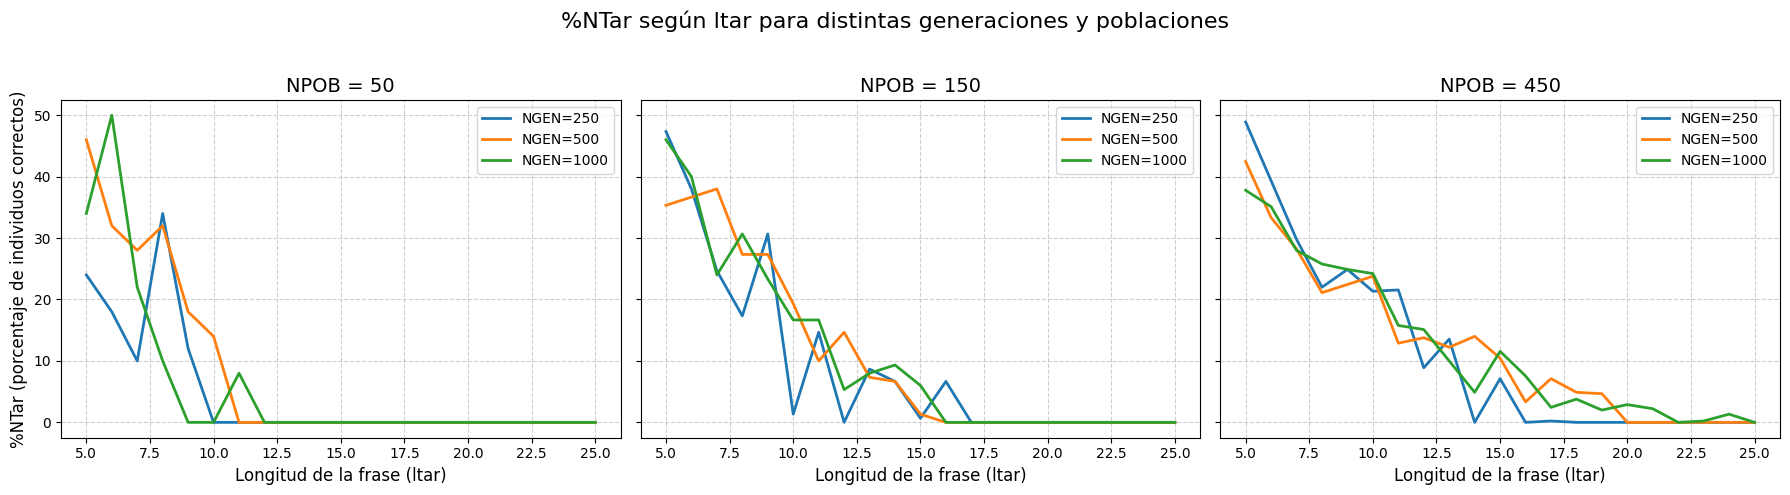

In [4]:
FRASES_OBJETIVO = [
    "Dooku", # 5 letras
    "Greedo", # 6 letras
    "Obi Wan", # 7 letras
    "Grievous", # 8 letras
    "Skywalker", # 9 letras
    "Darth Maul", # 10 letras
    "Darth Vader", # 11 letras
    "Qui Gon Jinn", # 12 letras
    "Padme Amidala", # 13 letras
    "Return of Jedi", # 14 letras
    "Hello there Obi", # 15 letras
    "I am your father", # 16 letras
    "Power of the dark", # 17 letras
    "No I am the senate", # 18 letras
    "The force is strong", # 19 letras
    "The force is with us", # 20 letras
    "The dark side is real", # 21 letras
    "The force binds us all", # 22 letras
    "I am one with the Force", # 23 letras
    "Fear is the path to dark", # 24 letras
    "The Force is strong in us", # 25 letras
]

def ejecutar_experimento(target: str, NPOB: int, NGEN: int, Pm: float = 0.1) -> dict:
    """
    Ejecuta una prueba del algoritmo genético para una frase objetivo determinada y
    devuelve métricas de rendimiento de la población final.

    LLanza una ejecución completa del algoritmo genético con los parámetros
    especificados, y calcula al final de la evolución las principales métricas que
    describen el comportamiento de la población en relación con la frase objetivo.

    Params:
        target (str): Frase objetivo que queremos alcanzar.
        NPOB (int): Número de individuos en la población.
        NGEN (int): Número de generaciones que ejecutaremos.
        Pm (float, opcional): Probabilidad de mutación por gen (por defecto 0.1).

    Returns:
        dict: Un diccionario con las siguientes claves:
            * "ltar" (int): Longitud de la frase objetivo.
            * "NPOB" (int): Número de individuos en la población.
            * "NGEN" (int): Número de generaciones ejecutadas.
            * "ncoinmax" (int): Número máximo de coincidencias con la frase objetivo.
            * "ncoinmedio" (float): Número medio de coincidencias con la frase objetivo.
            * "NTar" (int): Número de individuos que coinciden completamente con la frase objetivo.
            * "%NTar" (float): Porcentaje de individuos que coinciden completamente con la frase objetivo.
    """

    # Ejecutamos el algorito genético con los parámetros que pasan a la función
    ag = AlgoritmoGenetico(target, NPOB, NGEN, Pm, NRES=NGEN+1, NSAMPLE=NGEN+1)
    poblacion_final = ag.ejecutar()

    # Calculamos el número de coincidencias en la población final
    num_coincidencias = []

    for individuo in poblacion_final:
        coincidencias = sum(1 for a, b in zip(individuo, target) if a == b)
        num_coincidencias.append(coincidencias)

    # Calculamos el número máximo y medi de coincidencias
    num_concidencias_max = max(num_coincidencias)
    num_concidencias_medio = np.mean(num_coincidencias)

    # Calculamos el número de individuos que coinciden al 100% con la frase objetivo
    # y el porcentaje de coincidencias
    NTar = num_coincidencias.count(len(target))
    pNTar = 100 * NTar / NPOB

    return {
        "ltar": len(target),
        "NPOB": NPOB,
        "NGEN": NGEN,
        "ncoinmax": num_concidencias_max,
        "ncoinmedio": num_concidencias_medio,
        "NTar": NTar,
        "%NTar": pNTar
    }

# Definimos los parámetros para el experimento.
# Vamos a probar con poblaciones objetivo y con generaciones
poblaciones_experimento = [50, 150, 450]
generaciones_experimento = [250, 500, 1000]

resultados = []

# Para cade frase objetivo, vamos a ejectuar un experimento
# así podremos comprar los resultados en función de la longitud
# de la frase, el número de individuos y el número de generaciones
for frase_objetivo in FRASES_OBJETIVO:

    # Calculamos la longitud de la frase objetivo
    longitud_frase = len(frase_objetivo)

    # Ejecutamos el experimento para cada combinación de numero de individuos
    # y generaciones
    for NPOB in poblaciones_experimento:
        for NGEN in generaciones_experimento:
            print(f"Ejecutando experimento: ltar={longitud_frase}, NPOB={NPOB}, NGEN={NGEN}")
            resultado = ejecutar_experimento(frase_objetivo.upper(), NPOB, NGEN)
            resultados.append(resultado)

# Convertimos los resultados de todos los experimentos
# a un DataFrame
df = pd.DataFrame(resultados)

# Obtenemos los valores de NPOB para después porder
# hacer un subplot en función de ellos
valores_NPOB = sorted(df["NPOB"].unique())

# Creamos una figura con subplots: uno por cada NPOB
fig, axs = plt.subplots(1, len(valores_NPOB), figsize=(18, 5), sharey=True)

# Recorremos cada NPOB y dibujamos la evolución de %NTar
# en función de ltar en los experimentos
for indice, NPOB in enumerate(valores_NPOB):

    # Seleccionamos el subplot que corresponde a
    # el NPOB actual
    ax = axs[indice]

    # Cogemos solo las filas que tienen el NPOB
    # actual
    subset_NPOB = df[df["NPOB"] == NPOB]

    # Dibujamos una línea para cada valor de NGEN dentro de este NPOB
    for i, (NGEN, subset) in enumerate(subset_NPOB.groupby("NGEN")):
        # Ordenamos el subset por ltar para que la línea
        # se dibuje de forma ordenada (menor a mayor)
        subset_sorted = subset.sort_values("ltar")

        # Dibujamos la línea para este NGEN
        ax.plot(subset_sorted["ltar"], subset_sorted["%NTar"],
                label=f"NGEN={NGEN}", linewidth=2)

    ax.set_title(f"NPOB = {NPOB}", fontsize=14)
    ax.set_xlabel("Longitud de la frase (ltar)", fontsize=12)
    ax.grid(True, linestyle="--", alpha=0.6)
    if indice == 0:
        ax.set_ylabel("%NTar (porcentaje de individuos correctos)", fontsize=12)
    ax.legend(fontsize=10)

plt.suptitle("%NTar según ltar para distintas generaciones y poblaciones", fontsize=16)
plt.tight_layout(rect=(0, 0, 1, 0.95))
plt.show()

En este apartado vamos a analizar cómo influye la probabilidad de mutación ($P_m$) en el rendimiento del nuestro algoritmo genético para la frase `"ANIMULA VAGULA BLANDULA"` (tiene 23 letras). Para hacerlo, vamos a hacer varias ejecuciones del algoritmo, manteniendo el número de individuos y de generaciones y variando el valor $P_m$ entre $0.01$ y $0.5$. 

En cada ejecución, vamos a guardar las métricas del final de la evolución (el porcentaje y el número de individuos que son exactamente la frase objetivo, el número máximo de caracteres coincidentes con la frase, la media de coincidencias en la población y el número de coincidencias del indiviuo consenso).

Probando Pm = 0.010...
TARGET: ANIMULA VAGULA BLANDULA, ltar: 23, NPOB: 300, NGEN: 1000, Pm: 0.01

Generación nº0: Mejor individuo con 4 coincidencias, NTar = 0 (0.00%)
Consenso: JWH XLRTÑCZLKPFBTLQOYSA, Coincidencias medias: 1.00

 Muestra de la población:
 * MGHSX ZÑMFDÑKPWASPÑHXYD
 * PVNAILNVLNJRHJPPEBVLFDH
 * BVÑKÑLQLQVÑLGVGTVSLUHQK
 * QGWWLBYVKGINN Z QRIQVAH
 * NRMZRBUPUFYLUZ VGBQUHSB
 * FAARNMÑWZLZJZWRBHDGODOE
 * NTGLWGIVÑZIFUNZQJRYZBAY
 * YQROAJDPFMMMRKMEVEGROLA
 * JWXIOXRWUCSRTSELSAITGYT
 * UTZUTNBIUHLVBTJÑOJMALCJ
 * RJÑJPKCBXFERQCQJJUKYURV
 * RBCVQGOCT XAPNOHZLSROVL
 * JBOVÑCÑQVCQQPDFCVTNTFAW
 * DB TÑZSEGJC FPGATLD AZU
 *  OTTDHAMBMUDRFTKJLQKOMH
 * LWFDVOABÑQGPUUCEHJCQVTM
 * WEHGEYTFBMYQÑGCÑBCFOQAM
 * TTADOTECR VOBWMNABGKKZH
 * CODVLUXC ÑQGNLIPHANCC Q
 * JKOXYVYRDAXZXOCBXQFYX A
 * OÑE HYTCJEKOMSUOEVQSJHT
 * LWBZGABGUCHUFUOJMMSGFXQ
 * VYYCNNRONJXBIUXKWNGMSÑC
 * XNVCRXKNDIHSHOWUIJFRZTU
 * SZSQEQVABHRXBITOCUXNHZU
 * IKFSRMWIPFQONHGAGOHYYUR
 * KXIGKUÑGEVZWIPZXÑPRYÑSQ
 * G HADKCFC 

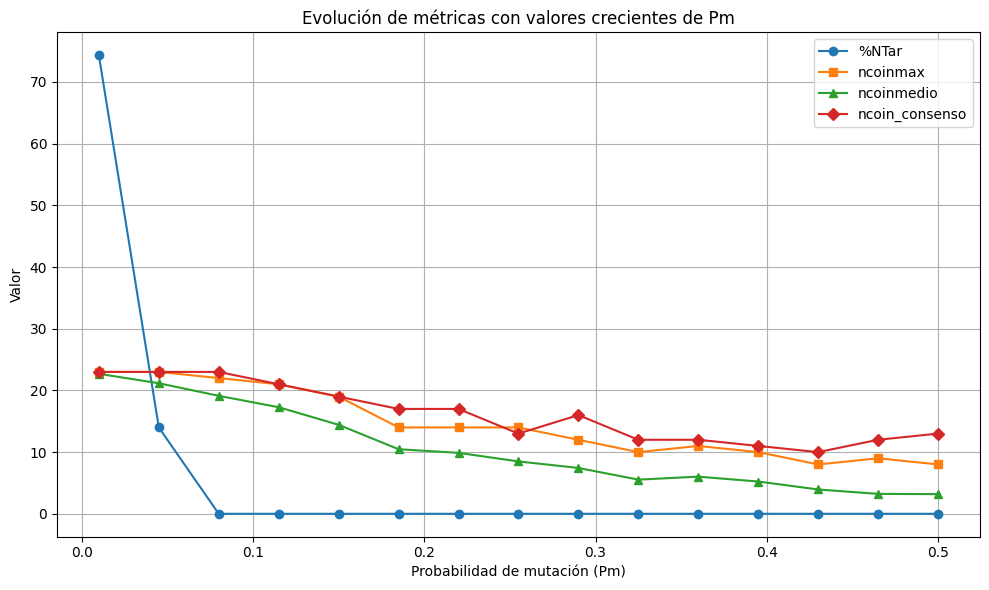

In [5]:
def experimento_vs_Pm(target: str, NPOB: int = 300, NGEN: int = 1000, valores_Pm = None):
    """
    Ejecuta un experimento para analizar el impacto de distintos valores de probabilidad
    de mutación (Pm) sobre el rendimiento del algoritmo genético con una frase objetivo fija.

    Para cada valor de Pm, ejecutamos el algoritmo con una población inicial aleatoria,
    un número fijo de generaciones (NGEN) y tamaño de población (NPOB). Al finalizar cada
    ejecución, calculamos el porcentaje y número de individuos que coinciden completamente
    con el objetivo, el número máximo y medio de coincidencias por individuo, y la calidad
    del individuo consenso.

    Parámetros:
        target (str): Frase objetivo que queremos alcanzar.
        NPOB (int, opcional): Número de individuos en la población. Por defecto 300.
        NGEN (int, opcional): Número de generaciones a ejecutar. Por defecto 1000.
        valores_Pm (list of float, opcional): Lista de valores de probabilidad de mutación a probar.
            Si no se especifica, se generan automáticamente 15 valores equiespaciados entre 0.01 y 0.5.

    Retorna:
        pandas.DataFrame: Un DataFrame con una fila por cada valor de Pm probado y las siguientes columnas:
            * "Pm": Valor de probabilidad de mutación utilizado.
            * "%NTar": Porcentaje de individuos que coinciden exactamente con el target.
            * "NTar": Número total de individuos perfectos.
            * "ncoinmax": Máximo número de caracteres coincidentes con el target.
            * "ncoinmedio": Media de coincidencias entre individuos y el target.
            * "consenso": Cadena de texto que representa el individuo consenso de la población.
            * "ncoin_consenso": Número de coincidencias del consenso con el target.
    """

    # Si no nos especifican valores de Pm, generamos 15 valores e
    # quiespaciados entre 0.01 y 0.5
    if valores_Pm is None:
        valores_Pm = np.linspace(0.01, 0.5, 15)

    # Creamos una lista para guardar los resultados de nuestro experimento
    resultados = []

    # Para cada valor de PM, ejecutamos el algoritmo genético
    # y calculamos las métricas de rendimiento
    for Pm in valores_Pm:
        print(f"Probando Pm = {Pm:.3f}...")

        # Ejecutamos el algoritmo genético
        ag = AlgoritmoGenetico(target, NPOB, NGEN, Pm, NRES=NGEN - 1, NSAMPLE=NGEN - 1)
        poblacion_final = ag.ejecutar()

        # Calculamos el número de coincidencias en la población final
        num_coincidencias = []

        for individuo in poblacion_final:
            coincidencias = sum(1 for a, b in zip(individuo, target) if a == b)
            num_coincidencias.append(coincidencias)

        # Calculamos el número máximo y medi de coincidencias
        num_concidencias_max = max(num_coincidencias)
        num_concidencias_medio = np.mean(num_coincidencias)

        # Calculamos el número de individuos que coinciden al 100% con la frase objetivo
        # y el porcentaje de coincidencias
        NTar = num_coincidencias.count(len(target))
        pNTar = 100 * NTar / NPOB

        # Calculamos el consenso de la población
        consenso = ag.obtener_consenso(poblacion_final)
        num_coincidencias_consenso = sum(1 for a, b in zip(consenso, target) if a == b)

        resultados.append({
            "Pm": Pm,
            "%NTar": pNTar,
            "NTar": NTar,
            "ncoinmax": num_concidencias_max,
            "ncoinmedio": num_concidencias_medio,
            "consenso": consenso,
            "ncoin_consenso": num_coincidencias_consenso
        })

    return pd.DataFrame(resultados)

# Ejecutamos el experimento con la frase objetivo
# "ANIMULA VAGULA BLANDULA" y los parámetros por defecto
df_pm = experimento_vs_Pm("ANIMULA VAGULA BLANDULA", NPOB=300, NGEN=1000)

# Mostramos los resultados del experimento en una gráfica
plt.figure(figsize=(10, 6))
plt.plot(df_pm["Pm"], df_pm["%NTar"], marker='o', label="%NTar")
plt.plot(df_pm["Pm"], df_pm["ncoinmax"], marker='s', label="ncoinmax")
plt.plot(df_pm["Pm"], df_pm["ncoinmedio"], marker='^', label="ncoinmedio")
plt.plot(df_pm["Pm"], df_pm["ncoin_consenso"], marker='D', label="ncoin_consenso")

plt.xlabel("Probabilidad de mutación (Pm)")
plt.ylabel("Valor")
plt.title("Evolución de métricas con valores crecientes de Pm")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()